# Exercise 3: Fourier properties

With this exercise you will get a better understanding of some of the Fourier theorems and of some useful properties of the DFT. You will write code to implement and verify several properties of the DFT that are discussed in the lectures. You will also learn to use the `dftModel.py` module of sms-tools, which contains the basic python functions implementing the DFT. There are five parts in the exercise: 1) Minimize energy spread in DFT of sinusoids, 2) Symmetry properties of the DFT, 3) Suppressing frequency components using DFT model, and 4) FFT size and zero-padding.

### Relevant Concepts

__DFT of sinusoids:__ When a real sinusoid has an integer number of cycles in $N$ samples, the frequency of the sinusoid exactly matches one of the bin frequencies in an $N$ point DFT. Hence the DFT spectrum of the sinusoid has a value of zero at every DFT bin except at the two bins that match the frequency of the sinusoid. Otherwise, the energy of the sinusoid is spread over all the bins. When there are multiple sinusoids, the equations extend to each sinusoid.

\begin{align}
 x[n]&=&A_{0}\cos\left(2\pi k_{0}n/N\right)=\frac{A_{0}}{2}{\textstyle e}^{j2\pi k_{0}n/N}+\frac{A_{0}}{2}{\textstyle e}^{-j2\pi k_{0}n/N}\\
 X[k] &=& \frac{A_0}{2} \,\,\, \mathrm{for} \,\,\, k = k_0, -k_0; \,\,\,\, 0 \,\,\,\mathrm{otherwise}
\end{align}

__Zero-padding:__ Zero-padding a signal is done by adding zeros at the end of the signal. If we perform zero-padding to a signal before computing its DFT, the resulting spectrum will be an interpolated version of the spectrum of the original signal.  In most implementations of the DFT (including the FFT algorithms) when the DFT size is larger than the length of the signal, zero-padding is implicitly done.

__Zero phase windowing:__ Zero phase windowing of a frame of a signal puts the centre of the signal at the zero time index for DFT computation. By moving the centre of the frame to zero index by a circular shift, the computed DFT will not have the phase offset which would have otherwise been introduced (recall that a shift of the signal causes the DFT to be multiplied by a complex exponential, which keeps the magnitude spectrum intact but changes the phase spectrum). When used in conjunction with zero-padding, zero phase windowing is also useful for the creation of a frame of length of power of 2 for FFT computation (`fftbuffer`).

If the length of the signal $x$ is $M$ and the required DFT size is $N$, the zero phase windowed version of the signal, `dftbuffer`, for DFT computation can be obtained by (works for both even and odd $M$):

    hM1 = floor((M+1)/2)
    hM2 = floor(M/2)
    dftbuffer = zeros(N)
    dftbuffer[:hM1] = x[hM2:]
    dftbuffer[-hM2:] = x[:hM2]

__Real, even and odd signals:__ A signal is real when it does not have any imaginary component, and all sounds are real signals. A signal $x$ is even if $x[n] = x[-n]$, and odd if $x[n] = -x[-n]$. For a signal of length $M$ (and $M$ is odd), in the context of a zero phase windowed signal and its DFT, the signal is even if $x[n] = x[M-n]$ and odd if $x[n] = -x[M-n]$, $1 \leq n \leq M-1$. The DFT properties show that for real input signals, the magnitude spectrum is even and the phase spectrum is odd. Furthermore, when the input signal is both real and even, the DFT is real valued, with an even magnitude spectrum and imaginary component equal to zero. In summary, if $x$ is an input signal of length $M$ ($M$ is odd) and $X = \mathrm{DFT}(x,M)$, then for $1 \leq k \leq M-1$

If $x$ is real, $\left|X[k]\right| = \left|X[M-k]\right|$ and $\boldsymbol{<}\!X[k] = -\boldsymbol{<}\!X[M-k]$

If $x$ is real and even, $\left|X[k]\right| = \left|X[M-k]\right|$ and $\mathrm{imag}(X[k]) = 0$


__Positive half of the DFT spectrum:__ Audio signals are real signals. Due to the symmetry properties of the DFT of a real signal, it is sufficient to store only one half of the magnitude and phase spectra. To save on both storage and computation, we will just store just the half spectrum when possible.

From an $N$ point DFT ($N$ even), we can obtain the positive half of the spectrum by considering only the first $(N/2)+1$ samples of the DFT. We can compute the magnitude spectrum of the positive half (in dB) as $m_X = 20\log_{10}\left|X[0:(N/2)+1]\right|$, where $X$ is the DFT of the input.

__Filtering:__ Filtering involves selectively suppressing certain frequencies present in the signal. Filtering is often performed in the time domain by the convolution of the input signal with the impulse response of a filter. The same operation can also be done in the DFT domain using the properties of DFT, by multiplying the DFT of the input signal by the DFT of the impulse response of the filter. In this assignment, we will consider a very simple illustrative filter that suppresses some frequency components by setting some DFT coefficients to zero. It is to be noted that the convolution operation here is circular convolution with a period $N$, the size of the DFT.

If $x_1[n] \Leftrightarrow X_1[k]$ and $x_2[n] \Leftrightarrow X_2[k]$, $x_1[n] * x_2[n] \Longleftrightarrow X_1[k]\,X_2[k]$


## Part 1 - Minimize energy spread in DFT of sinusoids

Given an input signal consisting of two sinusoids, the function `minimize_energy_spread_dft()` should select the first `M` samples from the signal and return the positive half of the DFT magnitude spectrum (in dB), such that it has only two non-zero values.

`M` is to be calculated as the smallest positive integer for which the positive half of the DFT magnitude spectrum has only two non-zero values. To get the positive half of the spectrum, first compute the `M` point DFT of the input signal (for this you can use the `fft()` function of `scipy.fftpack`). Consider only the first `(M/2)+1` samples of the DFT, computing the magnitude spectrum of the positive half (in dB) as `mX = 20*log10(abs(X[:M/2+1]))`, where `X` is the DFT of the input signal.

The input arguments to this function are the input signal `x` (of length W >= M) consisting of two sinusoids of frequency `f1` and `f2`, the sampling frequency `fs` and the value of frequencies `f1` and `f2`. The function should return the positive half of the magnitude spectrum `mX`. For this question, you can assume the input frequencies `f1` and `f2` to be positive integers and factors of `fs`, and that `M` is even.

Due to the precision of the FFT computation, the zero values of the DFT are not zero but very small values < 1e-12 (or -240 dB) in magnitude. For practical purposes, all values with absolute value less than 1e-6 (or -120 dB) can be considered to be zero.

HINT: The DFT magnitude spectrum of a sinusoid has only one non-zero value (in the positive half of the DFT spectrum) when its frequency coincides with one of the DFT bin frequencies. This happens when the DFT size (`M` in this question) contains exactly an integer number of periods of the sinusoid. Since the signal in this question consists of two sinusoids, this condition should hold true for each of the sinusoids, so that the DFT magnitude spectrum has only two non-zero values, one per sinusoid.

`M` can be computed as the Least Common Multiple (LCM) of the sinusoid periods (in samples). The LCM of two numbers `x`, `y` can be computed as: `x*y/gcd(x,y)`, where gcd denotes the greatest common divisor.

In [1]:
from scipy.fftpack import fft, fftshift
import numpy as np
from math import gcd, ceil, floor
from smstools.models.dftModel import dftAnal, dftSynth
from scipy.signal import get_window
import matplotlib.pyplot as plt

In [2]:
# E3 - 1.1: Complete the function minimize_energy_spread_dft()

def minimize_energy_spread_dft(x, fs, f1, f2):
    """ From a signal with two sinusoids compute its magnitude spectrum having only two non-zero value.

    Args:
        x (np.array): input signal
        fs (float): sampling frequency in Hz
        f1 (float): frequency of first sinusoid component in Hz
        f2 (float): frequency of second sinusoid component in Hz

    Returns:
        np.array: positive half of magnitude spectrum (in dB)

    """
    # Periods in samples
    N1 = int(fs / f1)
    N2 = int(fs / f2)

    # Compute M as LCM of N1 and N2
    M = int((N1 * N2) // gcd(N1, N2))
    print(f"LCM of {N1} and {N2} is {M}")

    # Take first M samples
    xM = x[:M]

    # Compute DFT
    X = fft(xM, M)

    # Positive half magnitude spectrum
    mX = 20 * np.log10(np.abs(X[:M//2 + 1]) + 1e-12)

    # Treat near-zero noise
    mX[mX < -120] = -120

    return mX



Test cases for `minimize_energy_spread_dft()`:

_Test case 1:_ For an input signal `x` sampled at `fs = 10000`Hz that consists of sinusoids of frequencies `f1 = 80`Hz and `f2 = 200`Hz, you need to select `M = 250` samples of the signal to meet the required condition. In this case, output `mX` is 126 samples in length and has non-zero values at bin indices 2 and 5 (corresponding to the frequency values of 80 and 200 Hz, respectively). You can create a test signal `x` by generating and adding two sinusoids of the given frequencies.

_Test case 2:_ For an input signal `x` sampled at `fs = 48000` Hz that consists of sinusoids of frequencies `f1 = 300`Hz and `f2 = 800`Hz, you need to select `M = 480` samples of the signal to meet the required condition. In this case, output `mX` is 241 samples in length and has non-zero values at bin indices 3 and 8 (corresponding to the frequency values of 300 and 800 Hz, respectively). You can create a test signal `x` by generating and adding two sinusoids of the given frequencies.

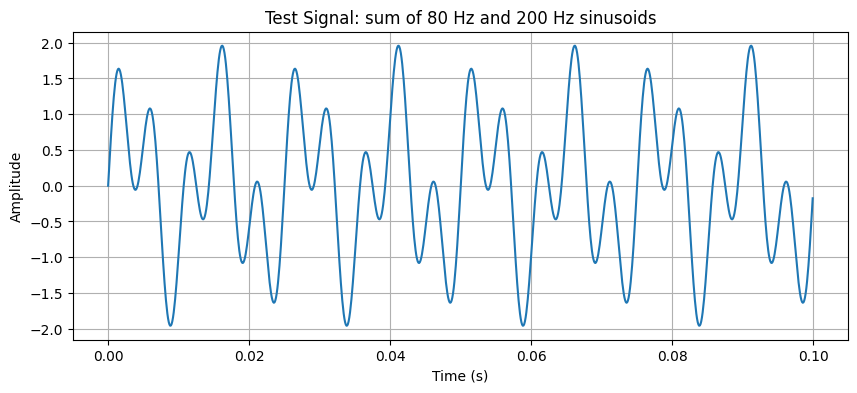

LCM of 125 and 50 is 250
Number of samples in magnitude spectrum: 126
Peak at bin k = 2, corresponding to f = 80.00 Hz
Peak at bin k = 5, corresponding to f = 200.00 Hz


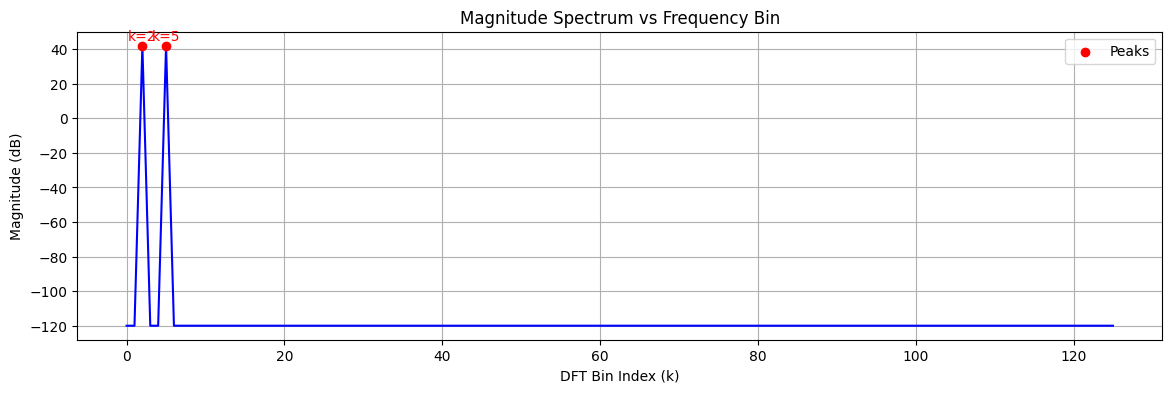

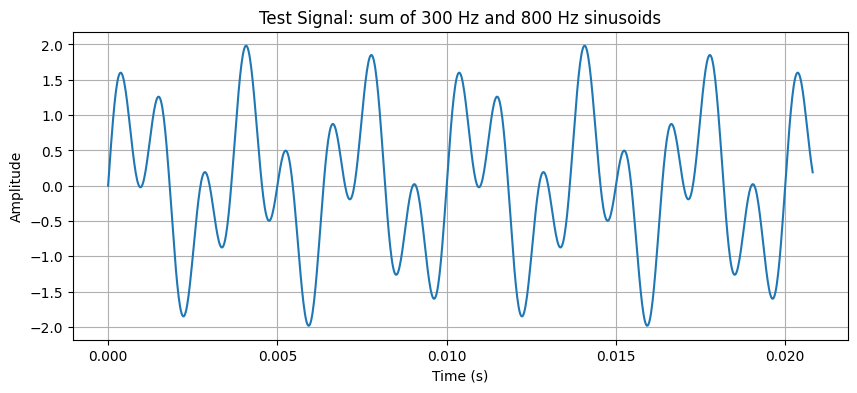

LCM of 160 and 60 is 480
Number of samples in magnitude spectrum: 241
Peak at bin k = 3, corresponding to f = 300.00 Hz
Peak at bin k = 8, corresponding to f = 800.00 Hz


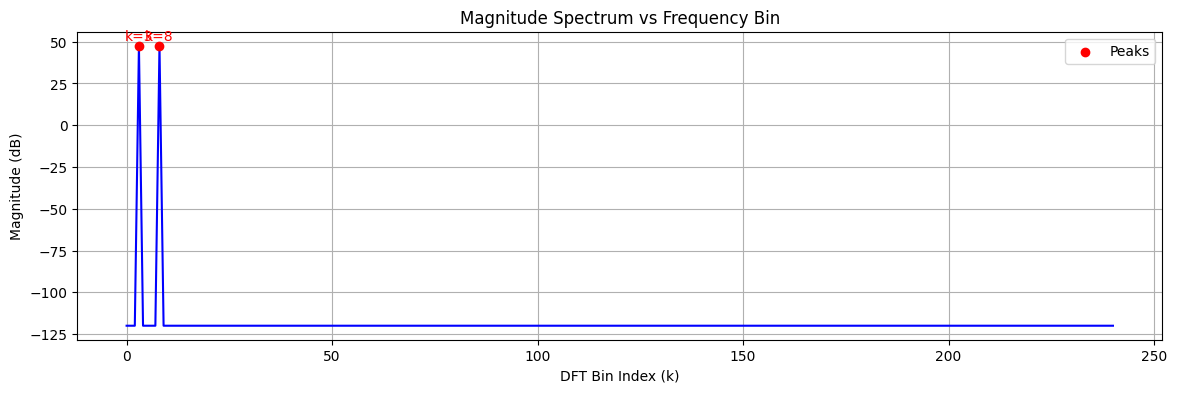

In [3]:
# E3 - 1.2: Compute and plot the two input signals proposed above, call the function minimize_energy_spread_dft(),
# and plot the output magnitude spectra

''' 
TEST CASE 1
Signal: sum of two sinusoids at 80 Hz and 200 Hz
'''

# Parameters
fs = 10000  # Sampling frequency in Hz

# Input signals
f1 = 80  # Frequency of first sinusoid in Hz
f2 = 200  # Frequency of second sinusoid in Hz

# Generate test signal
n = np.arange(1000)
x = np.sin(2*np.pi*f1*n/fs) + np.sin(2*np.pi*f2*n/fs)

# Plot the test signal
plt.figure(figsize=(10, 4))
plt.plot(n/fs, x)
plt.title('Test Signal: sum of 80 Hz and 200 Hz sinusoids')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Call the function
mX = minimize_energy_spread_dft(x, fs, f1, f2)

print("Number of samples in magnitude spectrum:", len(mX))

# Compute M from LCM of periods
N1 = int(fs / f1)
N2 = int(fs / f2)
M = int((N1 * N2) // np.gcd(N1, N2))

# Frequency bin indices
k = np.arange(M//2 + 1)

# Find the two peak bins
peak_indices = np.argsort(mX)[-2:]
peak_indices = np.sort(peak_indices)  # sort them ascending

# Print the bin indices and corresponding frequencies
for idx in peak_indices:
    freq = idx * fs / M
    print(f"Peak at bin k = {idx}, corresponding to f = {freq:.2f} Hz")

# Plot the magnitude spectrum
plt.figure(figsize=(14,4))
plt.plot(k, mX, 'b')
plt.title('Magnitude Spectrum vs Frequency Bin')
plt.xlabel('DFT Bin Index (k)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
# Highlight peaks
plt.scatter(peak_indices, mX[peak_indices], color='red', zorder=5, label='Peaks')
for idx in peak_indices:
    plt.text(idx, mX[idx]+3, f'k={idx}', ha='center', color='red')

plt.legend()
plt.show()

''' 
TEST CASE 2
Signal: sum of two sinusoids at 300 Hz and 800 Hz
'''

# Parameters
fs = 48000  # Sampling frequency in Hz

# Input signals
f1 = 300  # Frequency of first sinusoid in Hz
f2 = 800  # Frequency of second sinusoid in Hz

# Generate test signal
n = np.arange(1000)
x = np.sin(2*np.pi*f1*n/fs) + np.sin(2*np.pi*f2*n/fs)

# Plot the test signal
plt.figure(figsize=(10, 4))
plt.plot(n/fs, x)
plt.title('Test Signal: sum of 300 Hz and 800 Hz sinusoids')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Call the function
mX = minimize_energy_spread_dft(x, fs, f1, f2)

print("Number of samples in magnitude spectrum:", len(mX))

# Compute M from LCM of periods
N1 = int(fs / f1)
N2 = int(fs / f2)
M = int((N1 * N2) // np.gcd(N1, N2))

# Frequency bin indices
k = np.arange(M//2 + 1)

# Find the two peak bins
peak_indices = np.argsort(mX)[-2:]
peak_indices = np.sort(peak_indices)  # sort them ascending

# Print the bin indices and corresponding frequencies
for idx in peak_indices:
    freq = idx * fs / M
    print(f"Peak at bin k = {idx}, corresponding to f = {freq:.2f} Hz")

# Plot the magnitude spectrum
plt.figure(figsize=(14,4))
plt.plot(k, mX, 'b')
plt.title('Magnitude Spectrum vs Frequency Bin')
plt.xlabel('DFT Bin Index (k)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
# Highlight peaks
plt.scatter(peak_indices, mX[peak_indices], color='red', zorder=5, label='Peaks')
for idx in peak_indices:
    plt.text(idx, mX[idx]+3, f'k={idx}', ha='center', color='red')

plt.legend()
plt.show()


## Part 2 - Symmetry properties of the DFT

The function `test_real_even()` should check if the input signal is real and even using the symmetry properties of its DFT. The function will return the result of this test, the zero-phase windowed version of the input signal (`dftbuffer`), and its DFT.

Given an input signal `x` of length `M`, do a zero phase windowing of `x` without any zero-padding. Then compute the `M` point DFT of the zero phase windowed signal and use the symmetry of the computed DFT to test if the input signal `x` is real and even. Return the result of the test, the `dftbuffer` computed, and the DFT of the `dftbuffer`.

The input argument is a signal `x` of length `M`. The output is a tuple with three elements
`(isRealEven, dftbuffer, X)`, where `isRealEven` is a boolean variable which is `True` if `x` is real and even, else `False`. `dftbuffer` is the `M` length zero phase windowed version of `x`. `X` is the `M` point DFT of the `dftbuffer`.

To make the problem easier, we will use odd length input sequence in this question (`M` is odd).

Due to the precision of the FFT computation, the zero values of the DFT are not zero but very small values < 1e-12 in magnitude. For practical purposes, all values with absolute value less than 1e-6 can be considered to be zero. Use an error tolerance of 1e-6 to compare if two floating point arrays are equal.

Caveat: Use the imaginary part of the spectrum instead of the phase to check if the input signal is real and even.

In [4]:
# E3 - 2.1: Complete the function test_real_even()

def test_real_even(x):
    """check if x is real and even using the symmetry properties of its DFT.
    Args:
        x (np.array): input signal of length M (M is odd)

    Returns:
        tuple including:
        isRealEven (boolean): True if input x is real and even, and False otherwise
        dftbuffer (np.array): M point zero phase windowed version of x
        X (np.array): M point DFT of dftbuffer

    """
    M = len(x)
    if M % 2 == 0:
        raise ValueError("Input signal length M must be odd.")
    
    # Check symmetry properties
    isRealEven = np.allclose(np.imag(x), 0, atol=1e-6) and np.allclose(x, np.conj(x[::-1]), atol=1e-6)

    # Create zero-phase windowed version of x
    dftbuffer = np.zeros(M)
    half_M = M // 2
    dftbuffer[:half_M + 1] = x[half_M:]
    dftbuffer[half_M + 1:] = x[:half_M]

    # Compute DFT
    X = fft(dftbuffer, M)

    return (isRealEven, dftbuffer, X)


Test cases for `test_real_even()`:

_Test case 1:_ If `x = np.array([2, 3, 4, 3, 2])`, which is a real and even signal (after zero phase windowing), the function returns

```
(True, array([ 4., 3., 2., 2., 3.]), array([14.0000+0.j, 2.6180+0.j,
0.3820+0.j, 0.3820+0.j, 2.6180+0.j])) (values are approximate)
```

_Test case 2:_ If `x = np.array([1, 2, 3, 4, 1, 2, 3])`, which is not an even signal (after zero phase windowing), the function returns

```
(False,  array([ 4.,  1.,  2.,  3.,  1.,  2.,  3.]), array([ 16.+0.j,
2.+0.69j, 2.+3.51j, 2.-1.08j, 2.+1.08j, 2.-3.51j, 2.-0.69j])) (values are approximate)
```

To get a more realistic example use a longer input signal and plot the real and imaginary parts of the output spectrum `X`. For example, use `x = get_window('hanning', 51, fftbins=False)`, which is real an even, and plot `x`and the real and imaginary part of the spectrum `X`.


TEST CASE 1
Is the input signal real and even? True
dftbuffer (zero-phase windowed signal):
[4. 3. 2. 2. 3.]
DFT of the zero-phase windowed signal:
[14.        -0.j  2.61803399+0.j  0.38196601+0.j  0.38196601-0.j
  2.61803399-0.j]

TEST CASE 2
Is the input signal real and even? False
dftbuffer (zero-phase windowed signal):
[4. 1. 2. 3. 1. 2. 3.]
DFT of the zero-phase windowed signal:
[16.-0.j          2.+0.69589549j  2.+3.51351879j  2.-1.08208835j
  2.+1.08208835j  2.-3.51351879j  2.-0.69589549j]

TEST CASE WINDOW


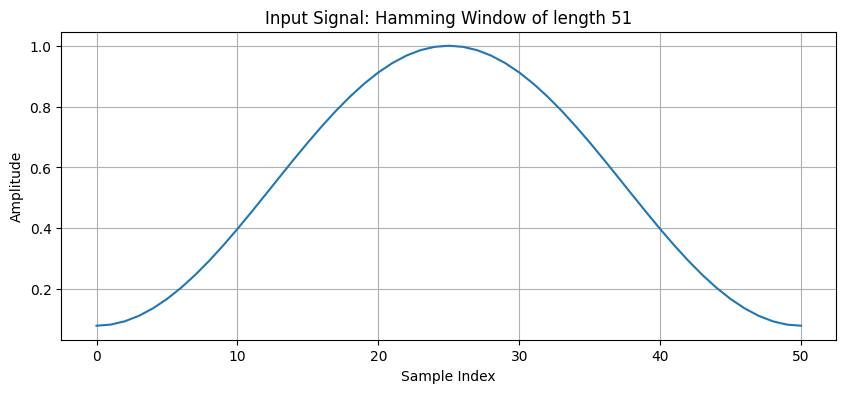

Is the input signal real and even? True
dftbuffer (zero-phase windowed signal):
[1.         0.99637276 0.98554825 0.96769718 0.94310107 0.91214782
 0.87532557 0.83321504 0.78648033 0.73585847 0.68214782 0.6261954
 0.56888364 0.51111636 0.4538046  0.39785218 0.34414153 0.29351967
 0.24678496 0.20467443 0.16785218 0.13689893 0.11230282 0.09445175
 0.08362724 0.08       0.08       0.08362724 0.09445175 0.11230282
 0.13689893 0.16785218 0.20467443 0.24678496 0.29351967 0.34414153
 0.39785218 0.4538046  0.51111636 0.56888364 0.6261954  0.68214782
 0.73585847 0.78648033 0.83321504 0.87532557 0.91214782 0.94310107
 0.96769718 0.98554825 0.99637276]
DFT of the zero-phase windowed signal:
[ 2.70800000e+01-0.00000000e+00j  1.18386487e+01+3.05006120e-15j
  1.61295037e-01+5.99967828e-16j -5.97808352e-02+8.69421829e-16j
  3.16616052e-02+5.96759368e-16j -1.96486488e-02+6.19077611e-16j
  1.33631800e-02+9.21957328e-16j -9.64935266e-03+6.98137481e-16j
  7.26695248e-03+6.02856911e-16j -5.64435012e-03+1.

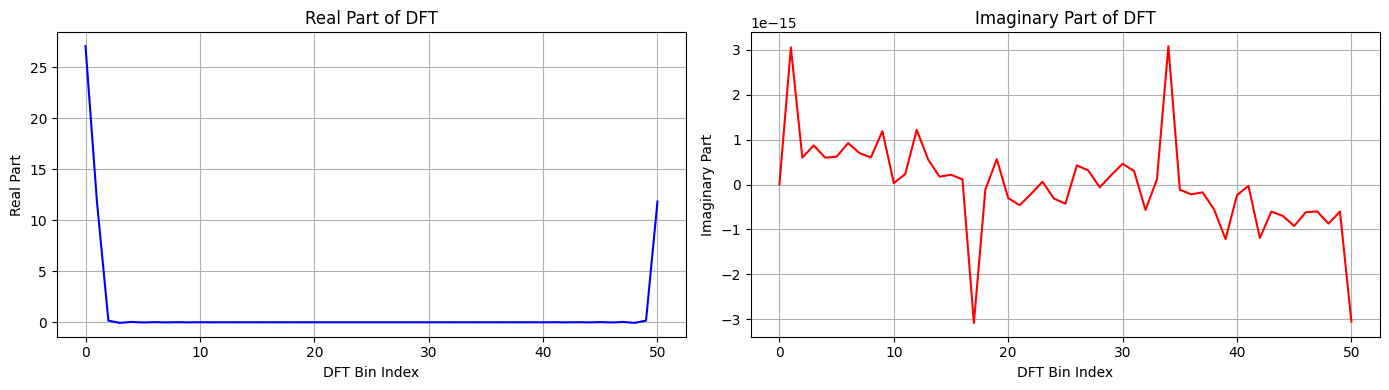

In [41]:
# E3 - 2.2: Plot the input signal proposed above (window signal), call the function test_real_even(),
# and plot its output spectrum (real and imaginary)


print("TEST CASE 1")

x = np.array([2, 3, 4, 3, 2])
output_tuple = test_real_even(x)
print("Is the input signal real and even?", output_tuple[0])
print("dftbuffer (zero-phase windowed signal):")
print(output_tuple[1])
print("DFT of the zero-phase windowed signal:")
print(output_tuple[2])


print("\nTEST CASE 2")

x = np.array([1, 2, 3, 4, 1, 2, 3])
output_tuple = test_real_even(x)
print("Is the input signal real and even?", output_tuple[0])
print("dftbuffer (zero-phase windowed signal):")
print(output_tuple[1])
print("DFT of the zero-phase windowed signal:")
print(output_tuple[2])

print("\nTEST CASE WINDOW")

x = get_window('hamming', 51, fftbins=False)

# Plot the input signal
plt.figure(figsize=(10, 4))
plt.plot(x)
plt.title('Input Signal: Hamming Window of length 51')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

output_tuple = test_real_even(x)
print("Is the input signal real and even?", output_tuple[0])
print("dftbuffer (zero-phase windowed signal):")
print(output_tuple[1])
print("DFT of the zero-phase windowed signal:")
print(output_tuple[2])

# Plot the real and imaginary parts of the DFT
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(np.real(output_tuple[2]), 'b')
plt.title('Real Part of DFT')
plt.xlabel('DFT Bin Index')
plt.ylabel('Real Part')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(np.imag(output_tuple[2]), 'r')
plt.title('Imaginary Part of DFT')
plt.xlabel('DFT Bin Index')
plt.ylabel('Imaginary Part')
plt.grid(True)

plt.tight_layout()
plt.show()


## Part 3 - Suppressing frequency components using DFT model

Given a signal as input, the function `supress_freq_dft_model()` should suppress the frequency components <= 70Hz using the DFT. It should return the filtered signal in the time domain.

Use the DFT to implement a very basic form of frequency domain filtering. Use the functions `dftAnal()` and `dftSynth()` provided in the `dftModel.py` module.

Use `dftAnal()` to obtain the magnitude spectrum (in dB) and phase spectrum of the audio signal. Set the values of the magnitude spectrum that correspond to frequencies <= 70 Hz to -120dB (there may not be a bin corresponding exactly to 70Hz, choose the nearest bin of equal or higher frequency, e.g., using `np.ceil()`).

Use `dftSynth()` to synthesize the filtered output signal. Then return the filtered signal.

Use a hamming window to smooth the signal. Hence, do not forget to scale the output signals by the sum of the window values (as done in `software/models_interface/dftModel_function.py`).  

Please note that this question is just for illustrative purposes and filtering is not usually done this way - such sharp cutoffs introduce artifacts in the output.

The input is a `M` length signal `x`, sampling frequency is `fs` and the FFT size `N`. The output is the filtered signal.

In [14]:
# E3 - 3.1: Complete the function suppress_freq_dft_model()

def suppress_freq_dft_model(x, fs, N):
    """
    Args:
        x (np.array): input signal of length M (odd size)
        fs (float): sampling frequency (Hz)
        N (int): FFT size

    Returns:
       np.array: output signal with filtering (N samples long)
    """
    M = len(x)
    w = get_window('hamming', M)
    outputScaleFactor = sum(w)

    # Analysis
    mX, pX = dftAnal(x, w, N)

    # Suppress frequencies below 70Hz
    freq_bins = np.fft.rfftfreq(N, d=1/fs)
    cutoff_bin = np.where(freq_bins >= 70)[0][0]
    mX[:cutoff_bin + 1] = -120  # Suppress frequencies <= 70 Hz

    # Synthesis (with hamming window smoothing)
    y = dftSynth(mX, pX, w.size) * outputScaleFactor
    
    # Output signal with filtering
    return y


Test case for the function `suppress_freq_dft_model()`:

_Test case 1:_ For an input signal with 40Hz, 100Hz, 200Hz, 1000Hz components, the output should only contain 100Hz, 200Hz and 1000Hz components.

_Test case 2:_ For an input signal with 23Hz, 36Hz, 230Hz, 900Hz, 2300Hz components, the output should only contain 230Hz, 900Hz and 2300Hz components.

To understand the effect of filtering, you can plot the magnitude spectra of the input and output signals superposed.

TEST CASE 1
Signal: input signal with 40Hz, 100Hz, 200Hz, 1000Hz components


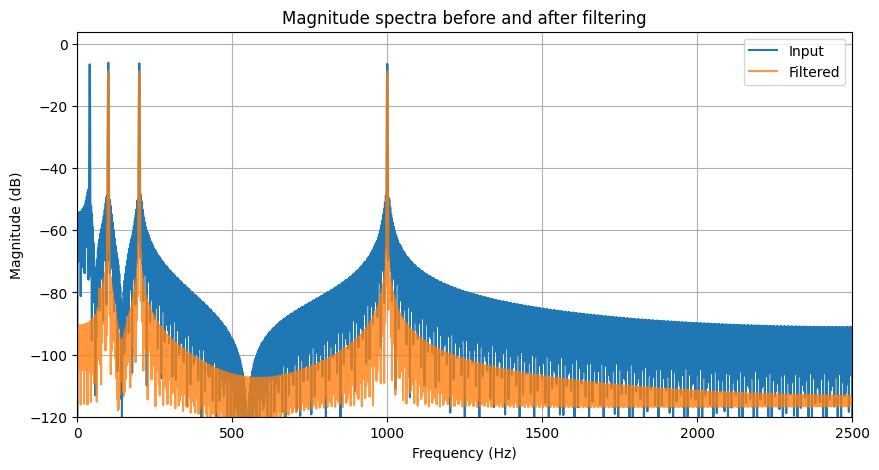

TEST CASE 2
Signal: input signal with 23Hz, 36Hz, 230Hz, 900Hz, 2300Hz components


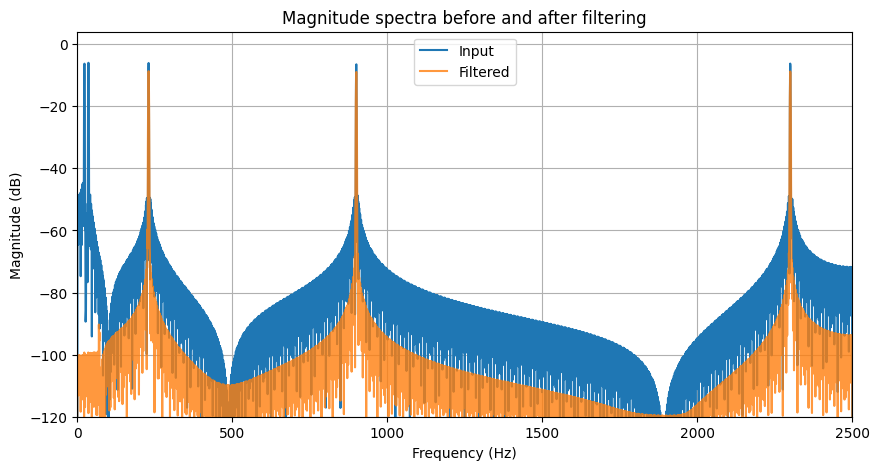

In [27]:
# E3 - 3.2: Compute the input signals proposed above and plot their magnitude spectra (x-axis in Hz),
# call the function suppress_freq_dft_model(), and plot the magnitude spectra of the output signals

print("TEST CASE 1")
print("Signal: input signal with 40Hz, 100Hz, 200Hz, 1000Hz components")

# Parameters
fs = 5000      # sampling rate (Hz) that safely covers all frequency components (max freq = Nyquist frequency = fs/2 = 2500 Hz)
T = 1          # duration (s)
N = 8192       # FFT size, power of 2 for efficiency, and bin size = fs/N = 5000/8192 ~ 2.44 Hz,        
               # good frequency resolution for the frequency components
               # also, for dftAnal we need N >= M (FFT size >= window length)
t = np.linspace(0, T, int(fs*T), endpoint=False)

# Frequencies of sinusoids in Hz
freqs = [40, 100, 200, 1000]  

# Input signal
x = np.sin(2 * np.pi * freqs[0] * t) + np.sin(2 * np.pi * freqs[1] * t) + np.sin(2 * np.pi * freqs[2] * t) + np.sin(2 * np.pi * freqs[3] * t)

# Apply frequency suppression
y = suppress_freq_dft_model(x, fs, N)

# Plot magnitude spectra before and after filtering
mX, pX = dftAnal(x, get_window('hamming', len(x)), N)
mY, pY = dftAnal(y, get_window('hamming', len(y)), N)
freqs = np.fft.rfftfreq(N, 1/fs)
plt.figure(figsize=(10,5))
plt.plot(freqs, mX, label='Input')
plt.plot(freqs, mY, label='Filtered', alpha=0.8)
plt.xlim(0, 2500)
plt.ylim(-120, np.max(mX)+10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.title('Magnitude spectra before and after filtering')
plt.grid()
plt.show()


print("TEST CASE 2")
print("Signal: input signal with 23Hz, 36Hz, 230Hz, 900Hz, 2300Hz components")

# Parameters
fs = 5000      # sampling rate (Hz) that safely covers all frequency components (max freq = Nyquist frequency = fs/2 = 2500 Hz)
T = 1          # duration (s)
N = 8192       # FFT size, power of 2 for efficiency, and bin size = fs/N = 5000/8192 ~ 2.44 Hz,        
               # good frequency resolution for the frequency components
               # also, for dftAnal we need N >= M (FFT size >= window length)
t = np.linspace(0, T, int(fs*T), endpoint=False)

# Frequencies of sinusoids in Hz
freqs = [23, 36, 230, 900, 2300]  

# Input signal
x = np.sin(2 * np.pi * freqs[0] * t) + np.sin(2 * np.pi * freqs[1] * t) + np.sin(2 * np.pi * freqs[2] * t) + np.sin(2 * np.pi * freqs[3] * t) + np.sin(2 * np.pi * freqs[4] * t)

# Apply frequency suppression
y = suppress_freq_dft_model(x, fs, N)

# Plot magnitude spectra before and after filtering
mX, pX = dftAnal(x, get_window('hamming', len(x)), N)
mY, pY = dftAnal(y, get_window('hamming', len(y)), N)
freqs = np.fft.rfftfreq(N, 1/fs)
plt.figure(figsize=(10,5))
plt.plot(freqs, mX, label='Input')
plt.plot(freqs, mY, label='Filtered', alpha=0.8)
plt.xlim(0, fs/2)
plt.ylim(-120, np.max(mX)+10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.title('Magnitude spectra before and after filtering')
plt.grid()
plt.show()

## Part 4 - Window-size, FFT-size, and zero-padding

The function `zp_fft_size_expt()` should take an input signal, compute three different magnitude spectra (with different parameters) and return them.

This function should provide some insights into the effects window-size, FFT-size, and zero-padding on the spectrum of a signal.

The input signal should be of size 512 samples, the sampling rate should be 1000Hz, and the analysis window used should be hamming. The three set of analysis parameters should be:

1. window-size = 256, FFT-size = 256 (no zero-padding)
2. window-size = 512, FFT-size = 512 (no zero-padding)
2. window-size = 256, FFT-size = 512 (zero-padding of 256 samples)

Use `dftAnal()` to obtain the positive half of the magnitude spectrum (in dB). Return the 3 magnitude spectra in dB.


In [24]:
# E3 - 4.1: Complete the function zp_fft_size_expt()

def zp_fft_size_expt(x, window_size=[256, 512, 256], FFT_size=[256, 512, 512]):
    """compute magnitude spectra of x with different window sizes and FFT sizes.

    Args:
        x (np.array): input signal (512 samples long)

    Returns:
        list with magnitude spectra (np.array)
    """

    if x.size != 512:
        raise ValueError("Input x must be exactly 512 samples long")

    if len(window_size) != 3 or len(FFT_size) != 3:
        raise ValueError("window_size and FFT_size must be lists of length 3")

    mX_list = []
    for M, N in zip(window_size, FFT_size):
        if M > N:
            raise ValueError(f"Window size M={M} cannot be larger than FFT size N={N}")
        # take the centered M-sample frame from the 512-sample signal
        start = (x.size - M) // 2
        frame = x[start:start + M].copy()
        # Hamming window
        w = np.hamming(M)
        # analyze with your provided dftAnal
        mX, _ = dftAnal(frame, w, N)
        mX_list.append(mX)

    return mX_list


Test cases for the function `zp_fft_size_expt()`:

_Test case 1:_ Use as input `x = .2*np.cos(2*np.pi*200*n)+.2*np.cos(2*np.pi*400*n)` where `n=np.arange(512)/fs` and the sampling rate `fs=1000`. Use the default arguments for `window_size` and `FFT_size`. Call the function with `mag_spectra = zp_fft_size_expt(x)`

To understand better, plot the output of `dftAnal()` for each case on a common frequency axis with different colors. You will see that `mag_spectra[2]` is the interpolated version of `mag_spectra[0]` (zero-padding leads to interpolation of the DFT). You will also observe that the 'mainlobe' of the magnitude spectrum in `mag_spectra[1]` will be narrower than that in `mag_spectra[0]` and `mag_spectra[2]`. This shows that having a longer window leads to a narrower mainlobe with better frequency resolution and less spreading of the energy of the sinusoid.

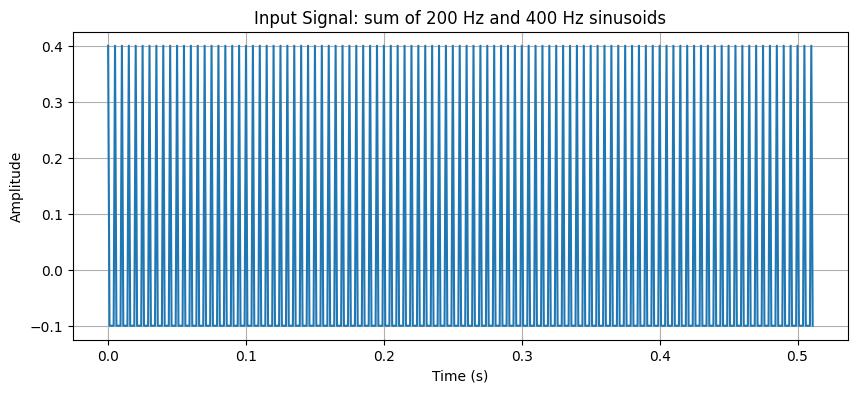

Play input signal


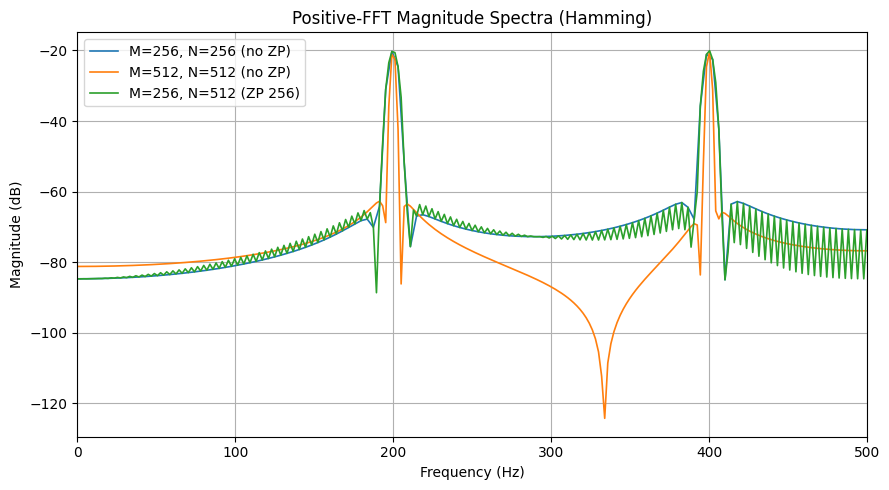

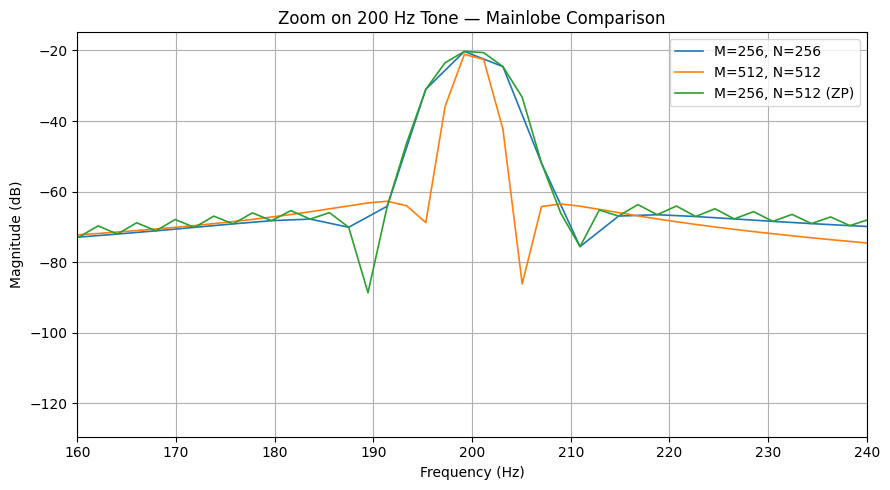

In [39]:
# E3 - 4.2: Compute, plot, and play the input signal proposed above, call the function zp_fft_size_expt(), and plot
# the outputs

fs=1000
n=np.arange(512)/fs
window_size=[256, 512, 256]
FFT_size=[256, 512, 512]

f1 = 200  # Frequency of first sinusoid in Hz
f2 = 400  # Frequency of second sinusoid in Hz
x = 0.2*np.cos(2*np.pi*f1*n)+0.2*np.cos(2*np.pi*f2*n)

# Plot of input signal
plt.figure(figsize=(10,4))
plt.plot(n, x)
plt.title('Input Signal: sum of 200 Hz and 400 Hz sinusoids')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

print("Play input signal")
import IPython.display as ipd
fs_play = 8000                      # audio sampling rate (8 kHz)
n_play = np.arange(8*512)/fs_play   # duration = 4096 samples / 8000 ≈ 0.512 s
x_play = 0.2*np.cos(2*np.pi*f1*n_play) + 0.2*np.cos(2*np.pi*f2*n_play)
ipd.display(ipd.Audio(data=x_play, rate=fs_play))

mag_spectra = zp_fft_size_expt(x)  # returns [mX_256_256, mX_512_512, mX_256_512]
mX_256_256, mX_512_512, mX_256_512 = mag_spectra

# Frequency axes for positive spectra
def freq_axis_from_len(fs, L):
    # positive-frequency axis from 0..fs/2 with exactly L points (N/2+1)
    return np.linspace(0.0, fs/2.0, L)

f_256 = freq_axis_from_len(fs, len(mX_256_256))
f_512a = freq_axis_from_len(fs, len(mX_512_512))
f_512b = freq_axis_from_len(fs, len(mX_256_512))

# Plot the output of `dftAnal()` for each case on a common frequency axis with different colors
plt.figure(figsize=(9,5))
plt.plot(f_256,  mX_256_256, label='M=256, N=256 (no ZP)', linewidth=1.2)
plt.plot(f_512a, mX_512_512, label='M=512, N=512 (no ZP)', linewidth=1.2)
plt.plot(f_512b, mX_256_512, label='M=256, N=512 (ZP 256)', linewidth=1.2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Positive-FFT Magnitude Spectra (Hamming)')
plt.xlim(0, fs/2)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot of zoomed mainlobe (near 200 Hz) to compare mainlobe widths
zoom_center = 200
zoom_halfspan = 40
plt.figure(figsize=(9,5))
plt.plot(f_256,  mX_256_256, label='M=256, N=256', linewidth=1.2)
plt.plot(f_512a, mX_512_512, label='M=512, N=512', linewidth=1.2)
plt.plot(f_512b, mX_256_512, label='M=256, N=512 (ZP)', linewidth=1.2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Zoom on 200 Hz Tone — Mainlobe Comparison')
plt.xlim(zoom_center - zoom_halfspan, zoom_center + zoom_halfspan)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Questions:**
E3 - 4.3: Explain the results of Part 4. If we were to estimate the frequency of the sinusoid using its DFT, a first principles approach is to choose the frequency value of the bin corresponding to the maximum in the DFT magnitude spectrum. If you were to take this approach, which of the magnitude spectra will give you a better estimate of the frequency of the sinusoid? Comment and discuss.

Based on the plot of zoomed mainlobe (near 200Hz), I think that even though mag_spectra[2] (M=256, N=512, zero-padding of 256) interpolates the spectrum and gives us a smoother curve around the peak, in the approach of choosing the frequency value of the bin corresponding to the maximum in the DFT magnitude spectrum, mag_spectra[1] (M=512, N=512, no zero-padding) has to be chosen. A longer window (M=512) gives a narrower mainlobe and less leakage, so the peak is sharper and less contaminated by adjacent bins or other tones and noise.

Numerically, the bin width Δf is 3.90625 Hz for N=256 and 1.953125 Hz for N=512, so the max-bin estimate’s worst-case quantization error halves when moving to N=512. Between the two N=512 cases, the longer window (M=512) yields a narrower mainlobe and less leakage, making the peak selection more robust. Zero-padding (M=256, N=512) only densifies the grid, it doesn’t improve resolution.